In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/pcruiher08/CovidVaccinationAnalysis/main/country_vaccinations.csv")
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [17]:
df.fillna(value = 0, inplace = True)
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)
date = df.date.str.split('-', expand =True)
date

0   1   2
0      2021  02  22
1      2021  02  23
2      2021  02  24
3      2021  02  25
4      2021  02  26
...     ...  ..  ..
86507  2022  03  25
86508  2022  03  26
86509  2022  03  27
86510  2022  03  28
86511  2022  03  29

[86512 rows x 3 columns]

In [18]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)
df.date = pd.to_datetime(df.date)
df.head()

country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                   0                  0   
1  Afghanistan      AFG 2021-02-23                   0                  0   
2  Afghanistan      AFG 2021-02-24                   0                  0   
3  Afghanistan      AFG 2021-02-25                   0                  0   
4  Afghanistan      AFG 2021-02-26                   0                  0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                        0                       0                   0   
1                        0                       0                1367   
2                        0                       0                1367   
3                        0                       0                1367   
4                        0                       0                1367   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                    0                               0   
1                                    0                              34   
2                                    0                              34   
3                                    0                              34   
4                                    0                              34   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  year  month  day  
0  World Health Organization  https://covid19.who.int/  2021      2   22  
1  World Health Organization  https://covid19.who.int/  2021      2   23  
2  World Health Organization  https://covid19.who.int/  2021      2   24  
3  World Health Organization  https://covid19.who.int/  2021      2   25  
4  World Health Organization  https://covid19.who.int/  2021      2   26

In [19]:
print('Data point starts from ',df.date.min(),'n')
print('Data point ends at ',df.date.max(),'n')
print('Total no of countries in the data set ',len(df.country.unique()),'n')
print('Total no of unique vaccines in the data set ',len(df.vaccines.unique()),'n')

Data point starts from  2020-12-02 00:00:00 n
Data point ends at  2022-03-29 00:00:00 n
Total no of countries in the data set  223 n
Total no of unique vaccines in the data set  84 n


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  int32         
 4   people_vaccinated                    86512 non-null  int32         
 5   people_fully_vaccinated              86512 non-null  int32         
 6   daily_vaccinations_raw               86512 non-null  int32         
 7   daily_vaccinations                   86512 non-null  int32         
 8   total_vaccinations_per_hundred       86512 non-null  int32         
 9   people_vaccinated_per_hundred        86512 non-null  int32         
 10  people_ful

In [21]:
df.describe()
df.country.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [22]:
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);

In [23]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.country))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [24]:
country_wise_total_vaccinated = {}
for country in df.country.unique() : 
    vaccinated = 0
    for i in range(len(df)) : 
        if df.country[i] == country : 
            vaccinated += df.daily_vaccinations[i]
    country_wise_total_vaccinated[country] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)
country_wise_total_vaccinated_df

c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


total_vaccinted_till_date
India                         1829085487
United States                  560111606
Brazil                         411378534
Indonesia                      373213575
Japan                          251739703
...                                  ...
Niue                                4324
Montserrat                          4320
Tokelau                             1966
Pitcairn                              43
China                        -1044624800

[223 rows x 1 columns]

In [25]:
fig = px.bar(country_wise_total_vaccinated_df, 
             y = 'total_vaccinted_till_date',
             x = country_wise_total_vaccinated_df.index,
             color = 'total_vaccinted_till_date',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )
fig.update_layout(
    title={
            'text' : "Vaccination till date in various countries",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",
    legend_title="Total vaccinated"
)
fig.show()

In [26]:
fig = px.line(df, x = 'date', y ='daily_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

In [27]:
# helper function
def plot_till_date(value1, value2, title, color1, color2) : 
    so_far_dict = {}
    for dates in df.date.unique() : 
        so_far_dict[dates], value1_count, value2_count = [], 0, 0
        for i in range(len(df)) : 
            if df.date[i] == dates : 
                value1_count += df[value1][i]
                value2_count += df[value2][i]
#         if dates not in so_far_dict.keys() : 
        so_far_dict[dates].append(value1_count) 
        so_far_dict[dates].append(value2_count)
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient = 'index', columns=[value1, value2])
    so_far_df.reset_index(inplace = True)
#     return so_far_df
    so_far_df.sort_values(by='index', inplace = True)
    plot = go.Figure(data=[go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value1], 
            stackgroup='one', 
            name = value1, 
            marker_color= color1), 
                           go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value2], 
            stackgroup='one',
            name = value2, 
            marker_color= color2) 
        ]) 
    plot.update_layout(
    title={
            'text' : title,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
    return plot.show()

In [28]:
plot_till_date('people_fully_vaccinated', 'people_vaccinated','People vaccinated vs Fully vaccinated till date', '#c4eb28', '#35eb28')


c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

overflow encountered in long_scalars

c:\Users\pcruiher08\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

overflow encountered in long_scalars



In [29]:
plot_till_date('people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'People vaccinated vs Fully vaccinated per hundred till date', '#0938e3','#7127cc')


In [30]:
def plot_pie(value, title, color) : 
    new_dict = {}
    for v in df[value].unique() : 
        value_count = 0
        for i in range(len(df)) : 
            if df[value][i] == v : 
                value_count += 1 
        new_dict[v] = value_count 
#     print(new_dict)
    new_df = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['Total'])
    if color == 'plasma' : 
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title,
                     color_discrete_sequence=px.colors.sequential.Plasma)
    elif color == 'rainbow' : 
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title,
                     color_discrete_sequence=px.colors.sequential.Rainbow)
    else :
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title)
    fig.update_layout(
        title={
            'y':0.95,
            'x':0.5
        },
        legend_title = value
    )
    return fig.show()
plot_pie('vaccines', 'Various vaccines and their uses', 'plasma')

In [31]:
df.vaccines.unique()


array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik Light, Sputnik V',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, S

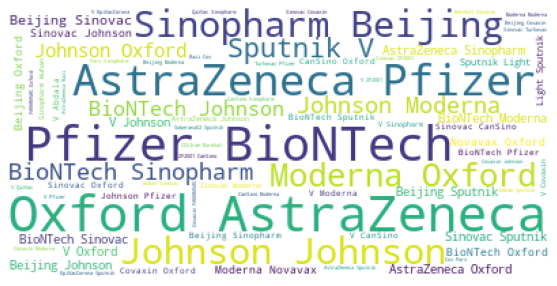

In [32]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))
plt.figure(figsize=(12,5))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [37]:
fig = px.line(df, x = 'date', y ='daily_vaccinations_per_million', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend per million",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations per million"
)
fig.show()

In [46]:
india_usa = [df[df.country == 'United States'], df[df.country == 'Mexico']]
result = pd.concat(india_usa)
fig = px.line(result, x = 'date', y ='total_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Total vaccinated - Mexico vs USA",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Total Vaccinations"
)
fig.show()

In [44]:
plot_map('total_vaccinations','Most vaccinated country', None)


AttributeError: 'str' object has no attribute 'shapeRecords'

<Figure size 792x648 with 0 Axes>

In [35]:
plot_map('vaccines','Vaccines Used in Different countries', None)


NameError: name 'plot_map' is not defined

In [36]:
plot_map('people_fully_vaccinated','People fully vaccinated in Different countries', 'haline')


NameError: name 'plot_map' is not defined